# Global Temperature and CO2 Emissions Analysis Project
# Group: G (Kevin Liang, Qianru Jing, Sean O'Hara)

## Abstract

The main motivation behind this particular project is from the group’s collective concern over the recent announcements made by the U.N regarding climate change. In order to gain a better sense of climate change, this project intends to create a visualization of the change in global temperature over a period of time. 

Another goal of this project is to examine the correlation between the amount of CO2 being emitted into the atmosphere and the global temperature changes over a period of time. We want to see if the amount of CO2 emissions is a factor in climate change. 

Finally, using the information gathered and created, we also want to create a simple model of recent temperature and CO2 trends in order to create predictive temperature and CO2 emission values for the near future.



## Data Sets

### Temperature Data Set
The Temperature dataset presents the estimates of monthly global surface temperature anomalies in comparison to the corresponding 1951-1980 temperature means, which serves as the baseline period. The units for the deviations are 0.01 degrees Celsius. Additional columns include annual and seasonal means of change. Data is gathered from meteorological stations, ocean areas, and polar stations, with adjustments made for outliers and homogeneity in urban areas. This dataset continues to be updated every month. 

This dataset can be found under “Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, LOTI): Global-mean monthly, seasonal, and annual means (1880-present)” in the NASA GISTEMP data collection. 

[Temp Data Link](https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.txt)

### CO2 Emissions Data Set
The CO2 Emissions dataset presents the annual global CO2 emissions estimates from 1751-2013, divided into sources of gas, liquids, solids, cement production, and gas flaring, with an additional column for per capita data. The units are in million metric tons of carbon. Global, regional, and national estimates from gridded 1° latitude by 1° longitude CO2 emissions data (Boden 2016) were combined with statistics about fossil-fuel burning, cement manufacturing, gas flaring in oil fields, energy production, consumption, and trade data (Marley 1984) to output this dataset. National population estimates made available in 1950 were used to estimate national per capita emissions. Global per capita estimates were calculated from this data.

This dataset can be found under “Andres R J; Boden T A; Marland G (1998): Annual Fossil-Fuel CO2 Emissions: Mass of Emissions Gridded by One Degree Latitude by One Degree Longitude (NDP-058.2016). Carbon Dioxide Information Analysis Center (CDIAC), Oak Ridge National Laboratory (ORNL), Oak Ridge, TN (USA)” in the US Department of Energy ESS-DIVE data archive.

[CO2 Data Link](http://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2013.ems)

### Libraries
For our Predictive Models, we used Linear Regression to produce a simple model to predict future values given the values that have been recorded before. For more information on the Linear Regression classes used, [click here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



## Read and Parse CO2 Data

This Section contains the code and steps taken to read and clean the CO2 data set into a usable format.

In [1]:
# Read in CO2 data from local text file, storing data in a list-of-lists

# Name: read_co2_data
# Function: reads in a file from the given path, and creates a list-of-lists representing the CO2 data
# Inputs: path to the local text file where the data is stored
# Outputs: a simple list-of-lists where each sublist is a row of the data

def read_co2_data(filepath):
    with open(filepath) as f:
        raw_data = f.readlines()
        header = raw_data[0].strip().split()
        data = {}
        for row in raw_data[1:]:
            row = row.strip().split()
            if len(row) > 1:
                data[int(row[0])] = {header[i] : float(row[i]) * 3.667 for i in range(1, len(row))}
    return data
       
co2_dict = read_co2_data('CO2-emissions.txt')

## Sample of the Cleaned CO2 Data (Years 1980 - 1985)

In [2]:
for i in range(1980, 1986):
    print("{}: {}".format(i, co2_dict[i]))

1980: {'Total': 19438.767, 'Gas': 2702.5789999999997, 'Liquids': 8881.474, 'Solids': 7095.6449999999995, 'Cement_Production': 440.03999999999996, 'Gas_Flaring': 315.36199999999997, 'Per_Capita': 4.363729999999999}
1981: {'Total': 18841.046, 'Gas': 2768.585, 'Liquids': 8393.762999999999, 'Solids': 6996.6359999999995, 'Cement_Production': 443.707, 'Gas_Flaring': 238.355, 'Per_Capita': 4.1803799999999995}
1982: {'Total': 18679.698, 'Gas': 2706.2459999999996, 'Liquids': 8052.732, 'Solids': 7245.991999999999, 'Cement_Production': 443.707, 'Gas_Flaring': 234.688, 'Per_Capita': 4.0703700000000005}
1983: {'Total': 18610.024999999998, 'Gas': 2709.913, 'Liquids': 7979.392, 'Solids': 7249.659, 'Cement_Production': 458.375, 'Gas_Flaring': 212.68599999999998, 'Per_Capita': 3.96036}
1984: {'Total': 19281.086, 'Gas': 2959.269, 'Liquids': 8063.732999999999, 'Solids': 7605.357999999999, 'Cement_Production': 469.376, 'Gas_Flaring': 187.017, 'Per_Capita': 4.0337000000000005}
1985: {'Total': 19864.139, 'G

# Read and Parse Temperature Data
This Section contains the code and steps taken to read and clean the Global Temperature Change data set into a usable format.

In [3]:
# Now we want to read in the temperature data, and similarly convert it to a dictionary of dictionaries.

# Name: read_temp_data
# Function: reads in a file from the given path, and creates a dictionary of the temperature data
# Inputs: path to the local text file where the temperature data is stored
# Outputs: a dictionary of dictionaries {year : {month : value, ... }}

# Note that, unlike when we read in the CO2 data, we use a helper function here "check_if_value".
# This is because missing data in the temperature file is indicated by asterisks (****), while
# missing data from the CO2 set was simply omitted.  
def read_temp_data(filepath):
    with open(filepath) as f:
        raw_data = f.readlines()
        header = raw_data[0].strip().split()
        data = {}
        for row in raw_data[1:]:
            row = row.strip().split()
            data[int(row[0])] = {header[i] : check_if_value(row[i]) for i in range(1, len(row) - 1)}
    return data

# Name: check_if_value
# Function: checks if the passed string is an integer
# Inputs: string to be checked
# Outputs: the integer equivalent of the string (if possible), otherwise None
def check_if_value(string, default = None):
    try:
        res = int(eval(str(string)))
        if type(res) == int:
            return res
    except:
        return default

    
temp_dict = read_temp_data("temp_data.txt")


## Sample of the Cleaned Temp Data (Years 1980 - 1985)

In [4]:
for i in range(1980, 1986):
    print("{}: {}".format(i, temp_dict[i]))

1980: {'Jan': 30, 'Feb': 43, 'Mar': 30, 'Apr': 33, 'May': 36, 'Jun': 17, 'Jul': 29, 'Aug': 23, 'Sep': 19, 'Oct': 18, 'Nov': 29, 'Dec': 19, 'J-D': 27, 'D-N': 29, 'DJF': 40, 'MAM': 33, 'JJA': 23, 'SON': 22}
1981: {'Jan': 55, 'Feb': 41, 'Mar': 49, 'Apr': 31, 'May': 24, 'Jun': 32, 'Jul': 34, 'Aug': 32, 'Sep': 17, 'Oct': 14, 'Nov': 24, 'Dec': 43, 'J-D': 33, 'D-N': 31, 'DJF': 38, 'MAM': 35, 'JJA': 32, 'SON': 18}
1982: {'Jan': 10, 'Feb': 15, 'Mar': -1, 'Apr': 9, 'May': 15, 'Jun': 5, 'Jul': 13, 'Aug': 7, 'Sep': 14, 'Oct': 13, 'Nov': 15, 'Dec': 43, 'J-D': 13, 'D-N': 13, 'DJF': 23, 'MAM': 8, 'JJA': 8, 'SON': 14}
1983: {'Jan': 52, 'Feb': 40, 'Mar': 42, 'Apr': 31, 'May': 36, 'Jun': 20, 'Jul': 17, 'Aug': 33, 'Sep': 39, 'Oct': 16, 'Nov': 32, 'Dec': 17, 'J-D': 31, 'D-N': 33, 'DJF': 45, 'MAM': 36, 'JJA': 24, 'SON': 29}
1984: {'Jan': 30, 'Feb': 17, 'Mar': 29, 'Apr': 8, 'May': 33, 'Jun': 5, 'Jul': 17, 'Aug': 16, 'Sep': 21, 'Oct': 16, 'Nov': 6, 'Dec': -5, 'J-D': 16, 'D-N': 18, 'DJF': 21, 'MAM': 23, 'JJA'

## Obtain Statistics about Global Temperature Data
This Section contains the code for obtaining statistics from the Global Temperature Data set

In [5]:
import statistics

# Name: temp_stats
# Function: Finds the maximum, minimum, and average temperature of
# Inputs: Dictionary of Dictionaries {year: {month:temp difference}}
# Outputs: Dictionary of Dictionaries {year: {statistic: value}}
def temp_stats(temp_dict):
    # List of Months
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # return Dictionary
    data = {}
    for year, values in temp_dict.items():
        # Get the Monthly Value
        monthly_val = [values.get(month, None) for month in months if values.get(month, None) is not None]
        data[year] = {'high': max(monthly_val), 'low': min(monthly_val), 'avg': round(statistics.mean(monthly_val))}
    return data

temp_stats = temp_stats(temp_dict)
        

## Sample of the Temperature Statistics (Years 1980 - 1985)

In [6]:
for i in range(1980, 1986):
    print("{}: {}".format(i, temp_stats[i]))

1980: {'high': 43, 'low': 17, 'avg': 27}
1981: {'high': 55, 'low': 14, 'avg': 33}
1982: {'high': 43, 'low': -1, 'avg': 13}
1983: {'high': 52, 'low': 16, 'avg': 31}
1984: {'high': 33, 'low': -5, 'avg': 16}
1985: {'high': 22, 'low': -7, 'avg': 12}


# Global Temperature Change Statistics Visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np



years = [int(year) for year in list(temp_stats.keys())]
averages = [temp_stats.get(year).get('avg') for year in years]
highs = [temp_stats.get(year).get('high') for year in years]
lows = [temp_stats.get(year).get('low') for year in years]

plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.plot(years, averages, color='black', label="average")
plt.xlabel("Year")
plt.ylabel("Land-Ocean Temperature in 0.01 degrees Celsius Difference from 1951-1980 Average")
plt.xticks(np.arange(min(years), max(years)+1, 5))
plt.plot(years, highs, color='red', label="highs")
plt.plot(years, lows, color='blue', label="lows")
plt.title("Global Temperature Statistics")
plt.grid()
plt.legend()
plt.show()



<Figure size 1200x640 with 1 Axes>

## Discussion: Global Temperature Change

As evident from the visualization above, there is an overall increase in the change of temperature, relative to the 1951-1980 average. In fact, in recent years, Global Temperature has actually managed to hit an increase of 1 degree celsius from the 1951-1980 average. 

To put some perspective to how serious a 1 degree change is, during the last Ice Age, Global Temperature was about <b>4 degrees Celsius</b> lower than the 1951-1980 average.

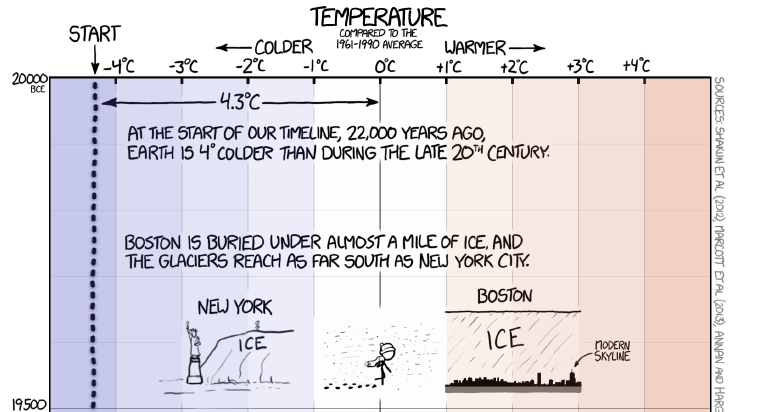

[Link to Full XKCD Comic](https://xkcd.com/1732/)

# Visualization of CO2 Emissions Over Time

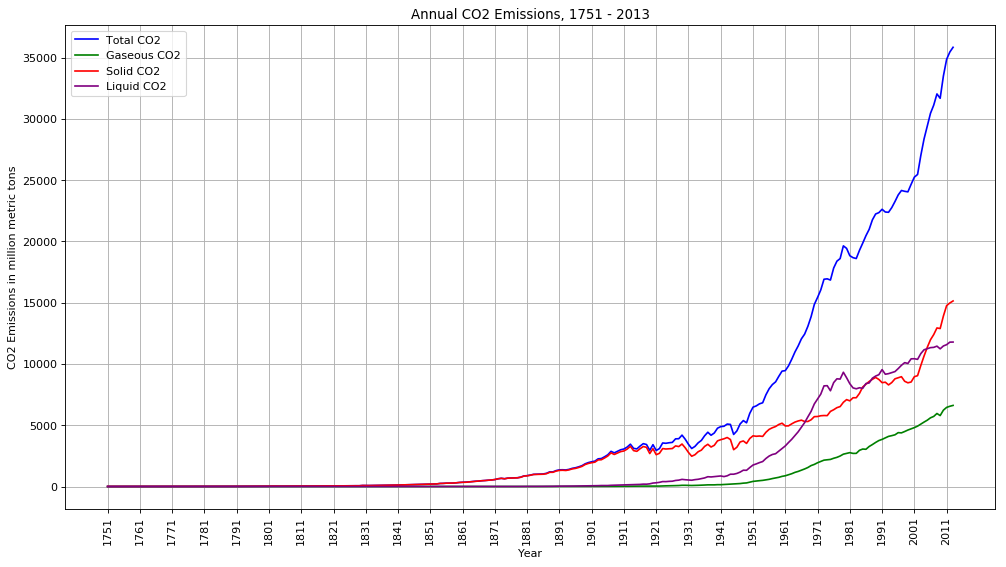

In [8]:
years_co2 = list(co2_dict.keys())
total_co2 = [co2_dict.get(year).get('Total') for year in years_co2]
gas_co2 = [co2_dict.get(year).get('Gas') for year in years_co2]
liquid_co2 = [co2_dict.get(year).get('Liquids') for year in years_co2]
solid_co2 = [co2_dict.get(year).get('Solids') for year in years_co2]


plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)

plt.plot(years_co2, total_co2, color='blue', label="Total CO2")
plt.plot(years_co2, gas_co2, color='green', label="Gaseous CO2")
plt.plot(years_co2, solid_co2, color='red', label="Solid CO2")
plt.plot(years_co2, liquid_co2, color='purple', label="Liquid CO2")

plt.xlabel("Year")
plt.ylabel("CO2 Emissions in million metric tons")
plt.title("Annual CO2 Emissions, 1751 - 2013")
plt.xticks(np.arange(min(years_co2), max(years_co2)+1, 10))
plt.grid()
plt.legend()
plt.show()




## Discussion: CO2 Emissions

As evident from the visualization above, considering how long the Earth has existed, the amount of CO2 being emitted into the atmosphere is actually increasing at an alarming rate. 

Here are some points of interest:
1. The "start" of increase in CO2 Emissions is around the early 1800's, which coincides with the height of the Industrial Revolution. 

2. Local increases that happen right before World War I and World War 2, and subsequent decreases right after the ends of the wars.

3. Slight reduction of CO2 Emissions during 1990 which coincides with the Kyoto Protocol

# Overlay Visuzalization of CO2 Emissions and Temperature Change

Since the CO2 Emissions Dataset and Global Temperature Change Dataset are measured over different time periods, we also truncated the datasets to only show the overlapping years when data was recorded for both datasets

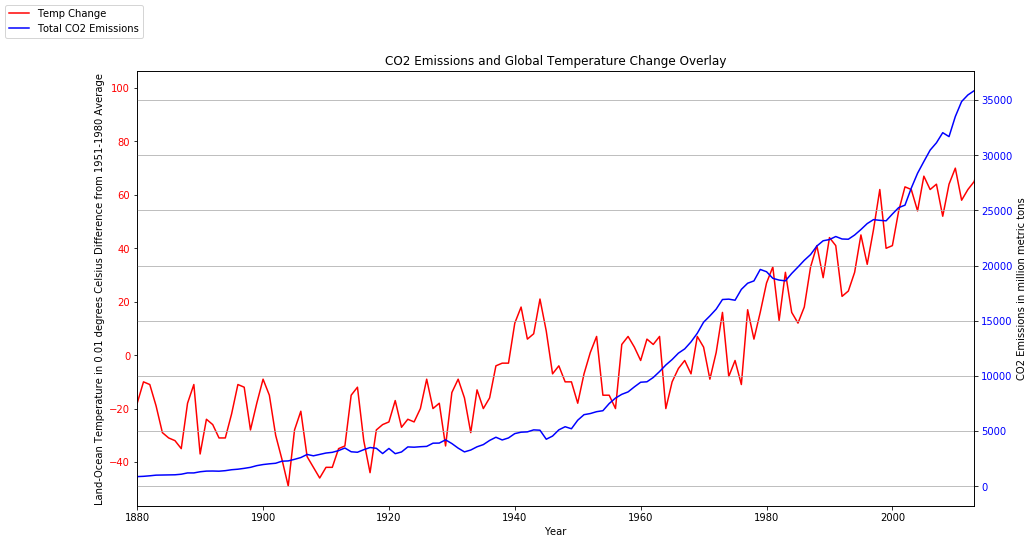

In [9]:
fig, ax1 = plt.subplots()

plt.title("CO2 Emissions and Global Temperature Change Overlay")

ax1.set_xlabel("Year")
ax1.set_ylabel("Land-Ocean Temperature in 0.01 degrees Celsius Difference from 1951-1980 Average")
ax1.plot(years, averages, color="red", label="Temp Change")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.set_ylabel("CO2 Emissions in million metric tons")
ax2.plot(years_co2, total_co2, color="blue", label="Total CO2 Emissions")
ax2.tick_params(axis='y', labelcolor="blue")

## Truncate both Data sets so that the years of recorded values overlap
## CO2 Data: 1750 - 2013
## Temp Data: 1880 - 2018
## Overlapping years: 1880-2013

plt.xlim([1880, 2013])

fig.set_figheight(8)
fig.set_figwidth(15)
fig.legend(loc=2)
plt.grid()
plt.show()

## Discussion: CO2 Emissions and Global Temperature Change Overlay

As Evident from the visualization above, there seems to be a high correlation between the amount of CO2 being emitted into the atmosphere, and general Global Temperature increase.

Points of Interest:
1. Although the increase in CO2 Emissions around the year of 1940 mark seems insignificant in the bigger picture, it was relatively significant increase at the time. In fact, the incremental spike in temperature at the time shows the significance of the excess CO2 being emitted into the air during the time of World War 2.

# Correlation Analysis

This section is dedicated to finding the correlation between CO2 Emissions and Global Temperature Change and generating a simple Linear Regression model to model the overall trend.

In [34]:
from sklearn.linear_model import LinearRegression
# Generic Function to produce Linear Regression Model
# Input: Array of Numbers Representing X axis values
#        Array of Numbers Representing Y axis values
# Output: Dictionary of Regression Model Values (Correlation Coefficient, Slope of Model, Intercept of Model)

def lin_reg_model(x_vals, y_vals):
    # Format the X values into 2D-Array
    format_x_vals = [[x] for x in x_vals]
    # Create the Linear Regression Model
    model = LinearRegression().fit(format_x_vals, y_vals)
    # Format into usable Dictionary
    ret_dict = {'cor_coeff': model.score(format_x_vals, y_vals) ,'slope' : model.coef_[0], 'intercept':model.intercept_}
    return ret_dict

# Generic Function to produce Linear Regression Model x values and y values
# Input: Array of Numbers Representing X axis values
#        Array of Numbers Representing Y axis values
# Output: Tuple of Arrays ([x-values], [y-values]) representing the values of the best fit line
def lin_reg_model_values(x_vals, y_vals):
    model = lin_reg_model(x_vals, y_vals)
    model_x_val = [i for i in range(round(min(x_vals)), round(max(x_vals)))]
    model_y_val = [(model['slope'] * i + model['intercept']) for i in model_x_val]
    return model_x_val, model_y_val
    

## Correlation Visualization between CO2 Emissions vs Global Temperature Change

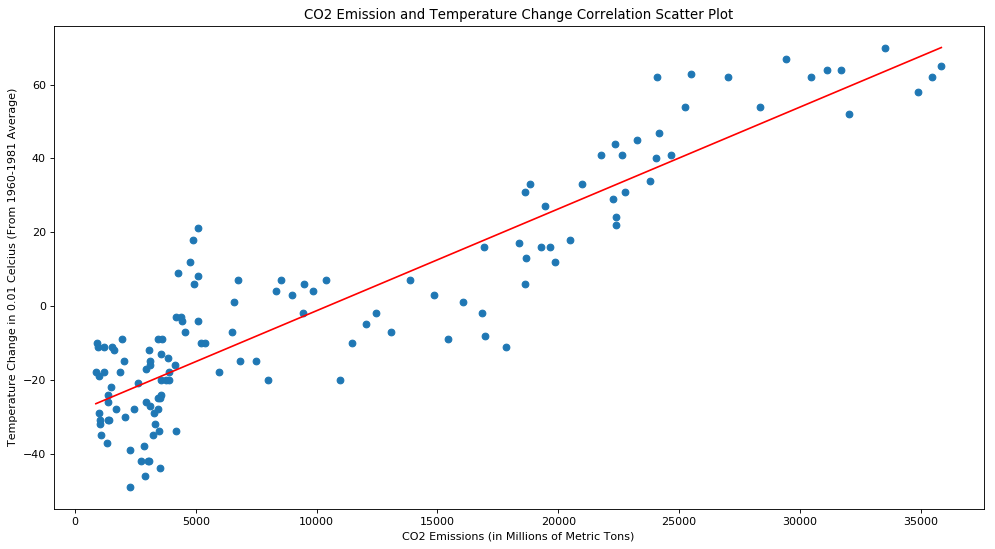

In [36]:
## CO2 Data: 1750 - 2013
## Temp Data: 1880 - 2018
## Overlapping years: 1880-2013
## Scatter Plot 
total_co2_trunc = total_co2[129:]
average_temp_trunc = averages[:-5]

# Linear Regression Model Line
x_vals, y_vals = lin_reg_model_values(total_co2_trunc, average_temp_trunc)

plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(total_co2_trunc, average_temp_trunc)
plt.plot(x_vals, y_vals, '-', color="red")
plt.title("CO2 Emission and Temperature Change Correlation Scatter Plot")
plt.xlabel("CO2 Emissions (in Millions of Metric Tons)")
plt.ylabel("Temperature Change in 0.01 Celcius (From 1960-1981 Average)")
plt.show()




## Discussion: CO2 Emissions and Global Temperature Change Correlation

As hypothesized before, it seems there is some linear correlation between CO2 Emissions and Global Temperature Change. From the Scatter Plot and Linear Regression model overlay depicted above, it is evident that, as more CO2 is produced and emitted, Global Temperature increases as well.

# Predictive Models

From the analyses and visualizations so far, it can be generally agreed that not only is there some correlation between the increase of Global Temperature and the increase of CO2 Emissions over the past century, but also that there exists a general uptrend of both CO2 Emissions and Global Temperature Change.

This section is dedicated to predicting what to expect in the coming years, in terms of Global Temperature Change and CO2 Emissions.

## Predictive Model Using Linear Regression


slope=[0.72837928]


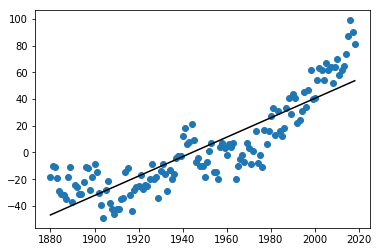

In [21]:
from sklearn.linear_model import LinearRegression

# Get Linear Regression Model for Temperature
year_fit = [[year] for year in years]
temp_fit = LinearRegression().fit(year_fit, averages)
temp_fit

# Slope of Best Fit Line
print("slope={}".format(temp_fit.coef_))
# Correlation Coefficient
temp_fit.score(year_fit, averages)

# Predicted Times
predicted_times = temp_fit.predict([[x] for x in years])

# Scatter Plot
plt.scatter(years, averages)
plt.plot(years, predicted_times, color="black")
plt.show()





